## Unobserved Component Models, Signal Extraction, and Filters

In [2]:
# 导入需要的包
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from scipy import stats

### Example 8.1

读入数据，用ARIMA(2,1,2)模型拟合得到如下结果：

In [5]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/All Share.csv")
ts=np.log(data['value'])
resultARIMA=ARIMA(ts,order=(2,1,2)).fit()
resultARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  791
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1258.558
Method:                       css-mle   S.D. of innovations              0.049
Date:                Sat, 08 Aug 2020   AIC                          -2505.115
Time:                        17:44:23   BIC                          -2477.076
Sample:                             1   HQIC                         -2494.338
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0057      0.002      3.071      0.002       0.002       0.009
ar.L1.D.value    -1.0472      0.054    -19.370      0.000      -1.153      -0.941
ar.L2.D.value    -0.8385      0.053    -15.912      0.000      -0.942      -0.735
ma.L1.D.value     1.1541      0.046     25.004      0.000       1.064       1.245
ma.L2.D.value     0.8842      0.047     18.935      0.000       0.793       0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6244           -0.8959j            1.0920           -0.3469
AR.2           -0.6244           +0.8959j            1.0920            0.3469
MA.1           -0.6526           -0.8397j            1.0634           -0.3551
MA.2           -0.6526           +0.8397j            1.0634            0.3551
-----------------------------------------------------------------------------
"""

根据结果得到模型为：
$(1+1.047B+0.839B^2)\triangledown x_t=0.0057+(1+1.155B+0.884B^2)e_t$

因此可以计算PHI1如下：

In [6]:
PHI1=(1+1.1541+0.8842)/(1+1.0472+0.8385)
print("PHI1=",PHI1)

PHI1= 1.0528814499081678


Beveridge-Nelson 趋势可以如下表示：
$\triangledown z_t=0.0057+1.053e_t$


### Example 8.2

导入数据

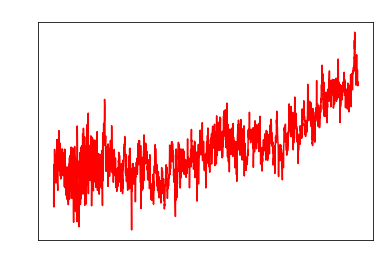

In [5]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/Global temperature.csv")
ts=data['value']
plt.plot(data['value'],'r')
plt.title("Global temperature",color="white")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

对信号进行滤波处理

In [14]:
def HPfilter(ts, lamb):
    def D_matrix(N):
        D = np.zeros((N-1,N))
        D[:,1:] = np.eye(N-1)
        D[:,:-1] -= np.eye(N-1)
        return D
    N = len(ts)
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    D = D2 @ D1
    g = np.linalg.inv((np.eye(N)+lamb*D.T@D))@ ts
    return g

分别取lambda的值为14400，129600，500000，作图查看

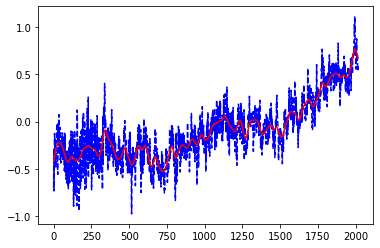

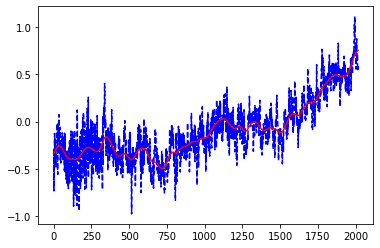

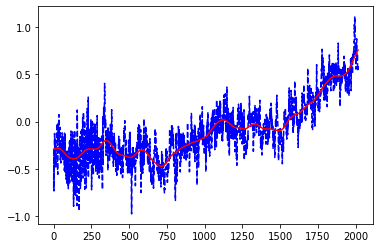

In [15]:
trend1=HPfilter(ts,14400)
trend2=HPfilter(ts,129600)
trend3=HPfilter(ts,500000)
plt.plot(ts,'b--')
plt.plot(trend1,'r')
plt.show()
plt.plot(ts,'b--')
plt.plot(trend2,'r')
plt.show()
plt.plot(ts,'b--')
plt.plot(trend3,'r')
plt.show()

可以看出，随着lambda的增大，滤波之后得到的序列越来越平缓，当lambda趋近于无穷时，将会是一条直线。

### Example 8.3

读入数据

In [16]:
GDP=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/GDP.csv")
GDP=np.log(GDP['value'])


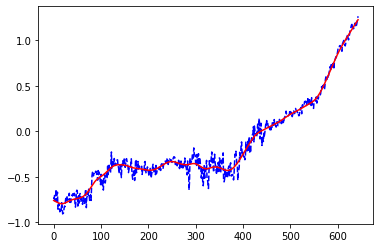

In [17]:
trend=HPfilter(GDP,10000)
plt.plot(GDP,'b--')
plt.plot(trend,'r')
plt.show()

通过年增长率的曲线可以得知，滤波之后的序列与年增长率的曲线是吻合的。


